### Task 5  - Train and test your policies

In this notebook, we use the trained model to test the performance of the policy.

In [20]:
import argparse

import gym

from stable_baselines3 import SAC
from env.custom_hopper import *
from gym import Wrapper
from mujoco_py import GlfwContext
import glfw
import matplotlib.pyplot as plt
import numpy as np
import os

In [21]:
n_episodes = 50
seed_value = 1234

In [22]:
source_env = gym.make('CustomHopper-source-v0')
target_env = gym.make('CustomHopper-target-v0')


In [23]:
source_model = SAC.load("SAC-hyper-eval_callback/SAC_steps_100000_lr_0.0003_gamma_0.99_tau_0.005_ent_coef_auto/best_model.zip")
target_model = SAC.load("SAC-hyper-eval_callback/SAC_steps_100000_lr_0.0003_gamma_0.99_tau_0.005_ent_coef_auto_target/best_model.zip")

In [24]:
rewards_list_source_source = np.array([])
rewards_list_source_target = np.array([])
rewards_list_target_target = np.array([])

In [25]:
for i in range(n_episodes):
    done = False
    source_env.seed(seed_value + i)
    state = source_env.reset()
    total_reward = 0
    step_count = 0

    while not done:
        action, _states = source_model.predict(state, deterministic=True)

        state, reward, done, info = source_env.step(action)
        total_reward += reward
        step_count += 1
        

    print(f"Episode {i} reward: {total_reward} in total {step_count} steps")
    rewards_list_source_source = np.append(rewards_list_source_source, total_reward)

Episode 0 reward: 1170.2465183466145 in total 391 steps
Episode 1 reward: 1198.857420807821 in total 401 steps
Episode 2 reward: 1079.487376146681 in total 356 steps
Episode 3 reward: 1203.781639530293 in total 404 steps
Episode 4 reward: 1216.852024172807 in total 412 steps
Episode 5 reward: 1222.0360152003666 in total 413 steps
Episode 6 reward: 1199.3228180880665 in total 401 steps
Episode 7 reward: 1208.0072099833378 in total 404 steps
Episode 8 reward: 1200.8485560287734 in total 399 steps
Episode 9 reward: 1241.4603155784903 in total 422 steps
Episode 10 reward: 1194.8984120656803 in total 403 steps
Episode 11 reward: 1120.142393210361 in total 374 steps
Episode 12 reward: 1190.4903761973433 in total 402 steps
Episode 13 reward: 1233.7402656090742 in total 422 steps
Episode 14 reward: 1237.3452924053593 in total 419 steps
Episode 15 reward: 1234.343580934988 in total 419 steps
Episode 16 reward: 1192.4195518731835 in total 397 steps
Episode 17 reward: 1162.0773503259418 in total 

In [26]:
for i in range(n_episodes):
    done = False
    target_env.seed(seed_value + i)
    state = target_env.reset()
    total_reward = 0
    step_count = 0

    while not done:
        action, _states = source_model.predict(state, deterministic=True)

        state, reward, done, info = target_env.step(action)
        total_reward += reward
        step_count += 1

    print(f"Episode {i} reward: {total_reward} in total {step_count} steps")
    rewards_list_source_target = np.append(rewards_list_source_target, total_reward)

Episode 0 reward: 852.7420834960893 in total 280 steps
Episode 1 reward: 799.9089942386285 in total 265 steps
Episode 2 reward: 888.1481920700843 in total 293 steps
Episode 3 reward: 807.6815032029328 in total 263 steps
Episode 4 reward: 803.0516165891312 in total 268 steps
Episode 5 reward: 817.6443682349866 in total 270 steps
Episode 6 reward: 808.4798310817898 in total 268 steps
Episode 7 reward: 797.574630342532 in total 258 steps
Episode 8 reward: 826.4185063177931 in total 272 steps
Episode 9 reward: 771.4527218923258 in total 250 steps
Episode 10 reward: 862.7416574542921 in total 282 steps
Episode 11 reward: 767.3375382875482 in total 246 steps
Episode 12 reward: 774.0670735280785 in total 249 steps
Episode 13 reward: 782.9269890500866 in total 254 steps
Episode 14 reward: 759.907947884288 in total 247 steps
Episode 15 reward: 868.0315761976831 in total 283 steps
Episode 16 reward: 858.6338773571255 in total 281 steps
Episode 17 reward: 761.2443500520969 in total 249 steps
Epis

In [27]:
for i in range(n_episodes):
    done = False
    target_env.seed(seed_value + i)
    state = target_env.reset()
    total_reward = 0
    step_count = 0

    while not done:
        action, _states = target_model.predict(state, deterministic=True)

        state, reward, done, info = target_env.step(action)
        total_reward += reward
        step_count += 1

    print(f"Episode {i} reward: {total_reward} in total {step_count} steps")
    rewards_list_target_target = np.append(rewards_list_target_target, total_reward)

Episode 0 reward: 1610.5399026787748 in total 500 steps
Episode 1 reward: 1543.355959650855 in total 500 steps
Episode 2 reward: 1500.3297771981283 in total 500 steps
Episode 3 reward: 1587.6367124275694 in total 500 steps
Episode 4 reward: 1561.1068944172466 in total 500 steps
Episode 5 reward: 1516.182103998069 in total 500 steps
Episode 6 reward: 1583.339949404261 in total 500 steps
Episode 7 reward: 1504.9927594494945 in total 500 steps
Episode 8 reward: 1635.41457912028 in total 482 steps
Episode 9 reward: 1530.3060499681994 in total 500 steps
Episode 10 reward: 1574.7617136434267 in total 500 steps
Episode 11 reward: 1524.0105733006003 in total 500 steps
Episode 12 reward: 1565.583769696052 in total 500 steps
Episode 13 reward: 1496.3742305816334 in total 500 steps
Episode 14 reward: 1531.5134033246875 in total 500 steps
Episode 15 reward: 1582.401801714155 in total 500 steps
Episode 16 reward: 1614.1109682432582 in total 500 steps
Episode 17 reward: 1557.4138094461473 in total 5

In [28]:
print(f"source-source: {rewards_list_source_source.mean()} +- {rewards_list_source_source.std()}")
print(f"source-target: {rewards_list_source_target.mean()} +- {rewards_list_source_target.std()}")
print(f"target-target: {rewards_list_target_target.mean()} +- {rewards_list_target_target.std()}")

source-source: 1189.6506140551917 +- 53.70013788502213
source-target: 807.881869442753 +- 39.18574511383026
target-target: 1572.525960476471 +- 43.40665982784896


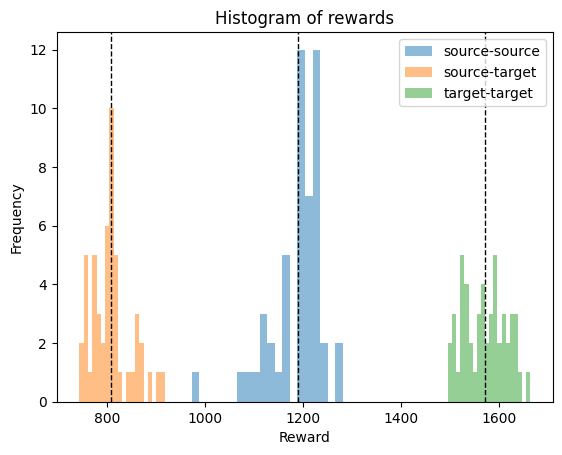

In [29]:
# plot histograms
plt.hist(rewards_list_source_source, bins=20, alpha=0.5, label='source-source')
plt.hist(rewards_list_source_target, bins=20, alpha=0.5, label='source-target')
plt.hist(rewards_list_target_target, bins=20, alpha=0.5, label='target-target')

# plot a vertical line for the mean
plt.axvline(rewards_list_source_source.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rewards_list_source_target.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rewards_list_target_target.mean(), color='k', linestyle='dashed', linewidth=1)

plt.legend(loc='upper right')
plt.title('Histogram of rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()

[1234]